## **Importing Some Important Libraries**

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge, Lasso 
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

## **Read the Dataset**

In [168]:
df = pd.read_csv(r"D:\PYTHON1\Advance ML Project Using Chatgpt\diamonds.csv")
df.head() 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [169]:
df.shape

(53940, 11)

## **Data Preprocessing Steps**

#### **Removing Irrelavant Columns**

In [170]:
df['Unnamed: 0'].nunique() 

53940

* Since column 'Unnamed: 0' does not contribute to the analysis and only contains unique values for each row, dropping it is a good decision.
This will help you focus on the relevant data that can provide meaningful insights.

In [171]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [172]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

#### **Handle Null values**

In [173]:
df.isnull().sum().sum() 

0

#### **Handle Duplicate Values**

In [174]:
df.duplicated().sum() 

146

In [175]:
df.drop_duplicates(inplace=True)

In [176]:
df.duplicated().sum() 

0

#### **Checking the Data Types**

In [177]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

#### **Checking Data Consistency**

In [178]:
df.describe() 

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## **Separating Numerical and Categorical Features**

In [179]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index

In [180]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [181]:
num_cols

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

## **EDA** 

#### **Categorical Features**

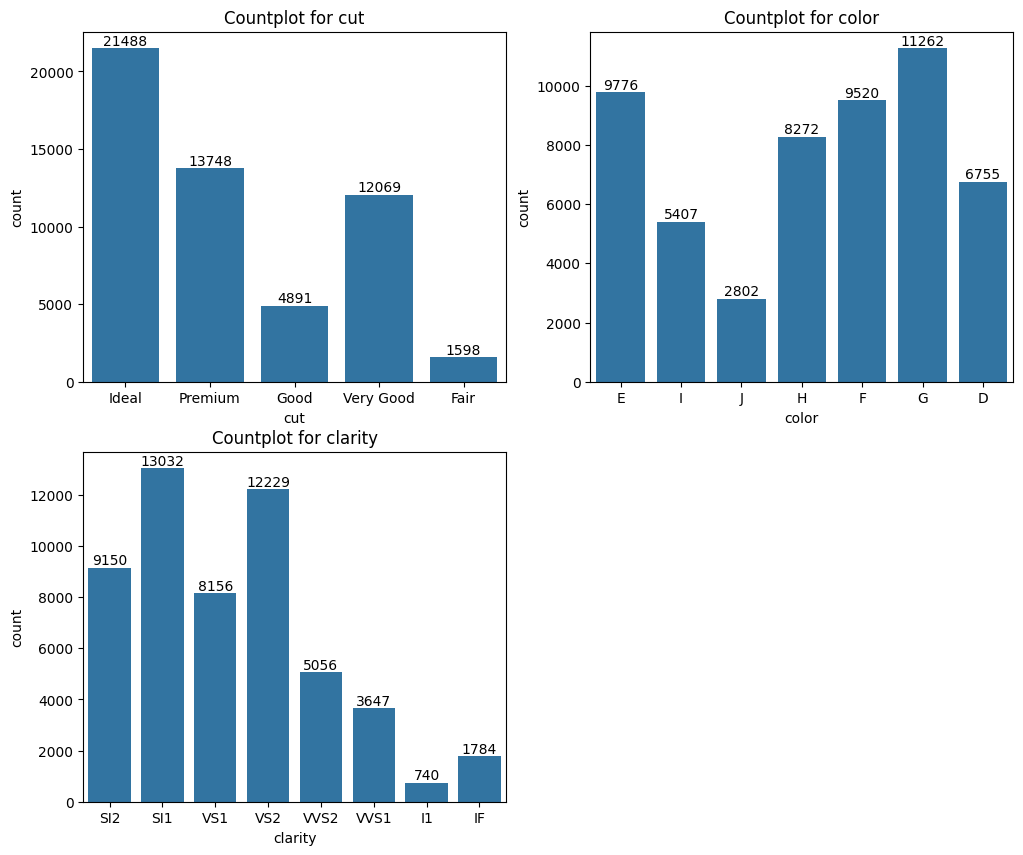

In [182]:
plt.figure(figsize=(12, 10))
for i in range(len(cat_cols)):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

#### **Numerical Features**

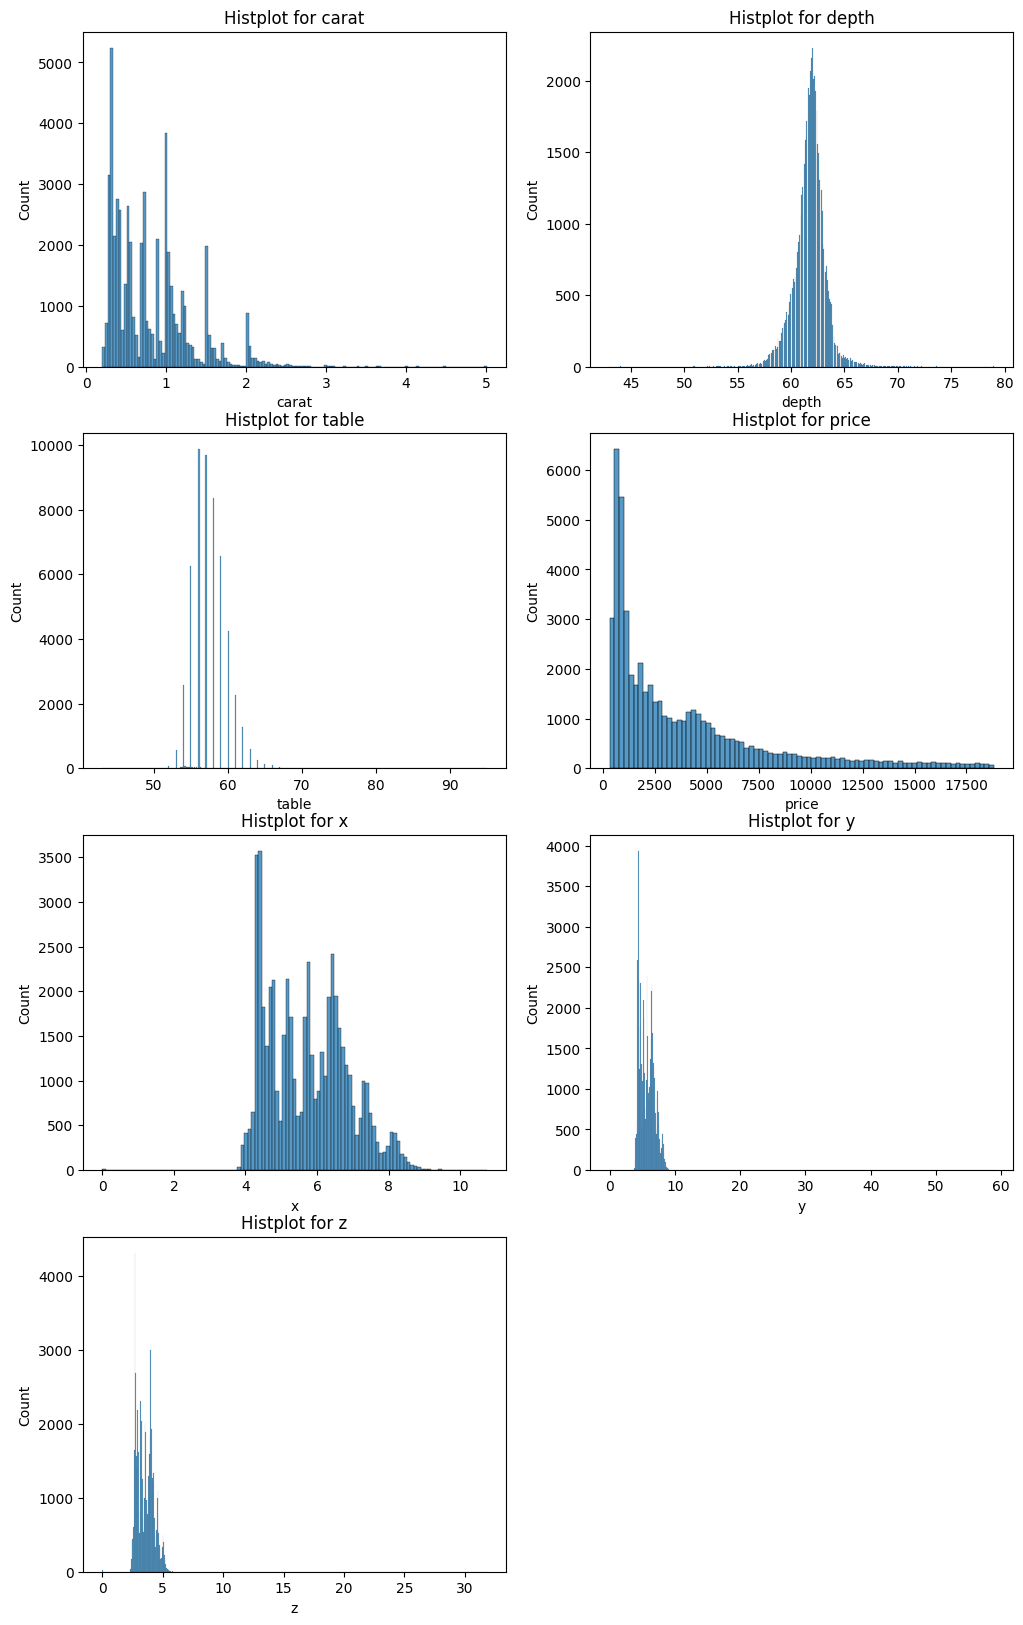

In [183]:
plt.figure(figsize=(12, 20))
for i in range(len(num_cols)):
    plt.subplot(4, 2, i + 1)
    ax = sns.histplot(x=df[num_cols[i]])
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

## **Correlation**

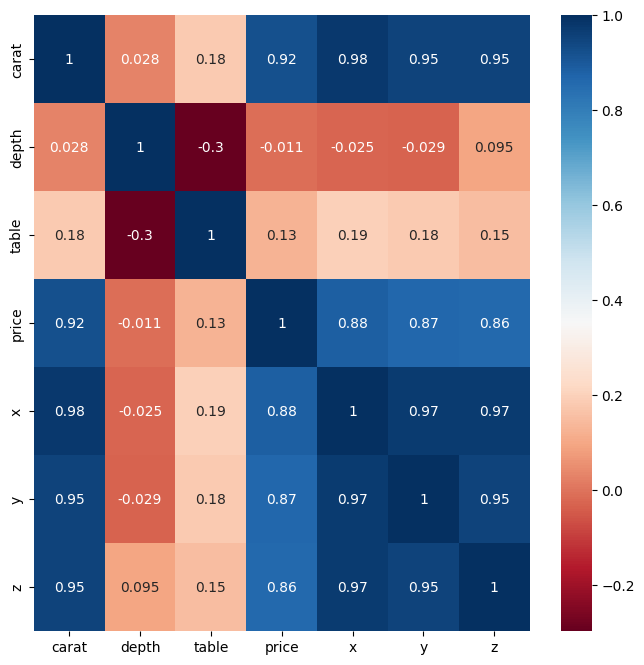

In [184]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True, cmap='RdBu')
plt.show()  

## **Outlier Treatment**

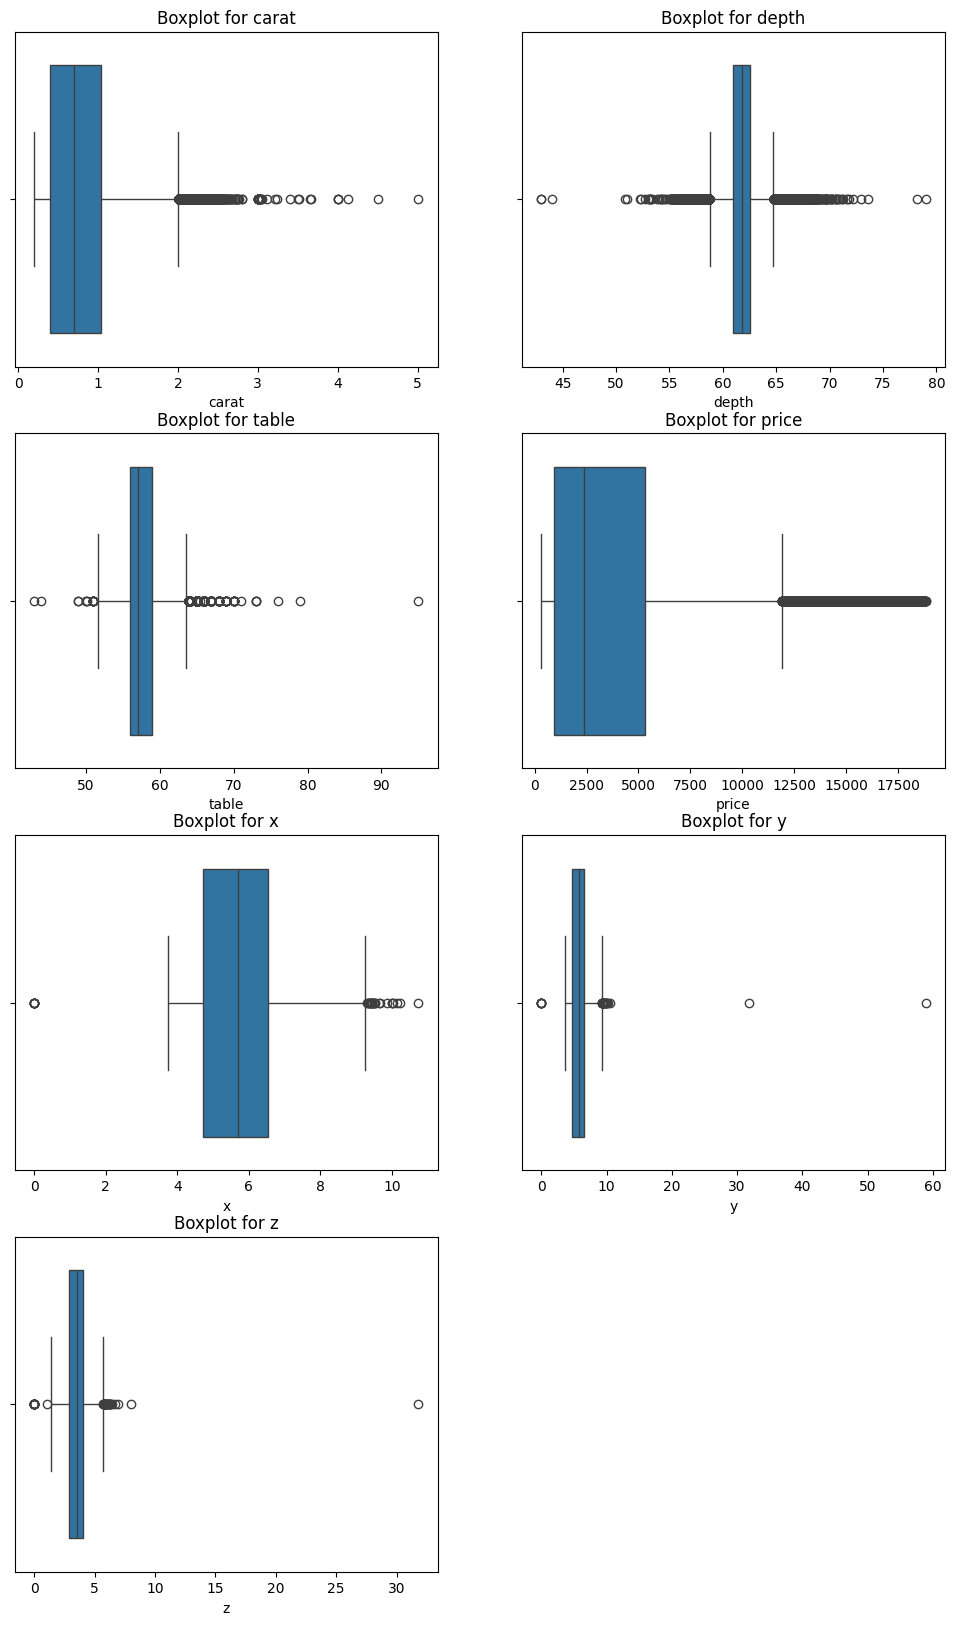

In [185]:
plt.figure(figsize=(12, 20))
for i in range(len(num_cols)):
    plt.subplot(4, 2, i + 1)
    ax = sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

#### **Detecting Outliers** 

In [186]:
w1 = df[num_cols].describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.97,0.98,0.99]).T
w1 = w1.iloc[:,3:]
w1

,min,1%,5%,10%,25%,50%,75%,90%,95%,97%,98%,99%,max
carat,0.2,0.24,0.30,0.31,0.40,0.70,1.04,1.51,1.70,2.01,2.04,2.18,5.01
depth,43.0,57.90,59.30,60.00,61.00,61.80,62.50,63.30,63.80,64.20,64.70,65.60,79.00
table,43.0,53.00,54.00,55.00,56.00,57.00,59.00,60.00,61.00,62.00,63.00,64.00,95.00
price,326.0,429.00,544.00,646.00,951.00,2401.00,5326.75,9818.70,13100.05,15065.00,16169.00,17377.14,18823.00
x,0.0,4.02,4.29,4.36,4.71,5.70,6.54,7.30,7.66,8.07,8.18,8.35,10.74
y,0.0,4.04,4.30,4.36,4.72,5.71,6.54,7.30,7.64,8.05,8.17,8.33,58.90
z,0.0,2.48,2.65,2.69,2.91,3.53,4.03,4.52,4.73,4.98,5.05,5.15,31.80


In [187]:
print(df.shape)

(53794, 10)


#### **Count Of Outliers**

In [188]:
print(df[df['price']<429.0].shape)  
print(df[df['price']>17377.14].shape)  

print(df[df['carat']>2.18].shape) 

print(df[df['table']<53.00].shape) 
print(df[df['table']>64.00].shape)  

print(df[df['depth']<57.90].shape) 
print(df[df['depth']>65.60].shape)  

(528, 10)
(538, 10)
(509, 10)
(76, 10)
(328, 10)
(499, 10)
(508, 10)


In [189]:
print(df[df['x']<4.02].shape) 
print(df[df['x']>8.35].shape)  

print(df[df['y']<4.04].shape)
print(df[df['y']>8.33].shape)  

print(df[df['z']<2.48].shape) 
print(df[df['z']>5.15].shape) 

(533, 10)
(536, 10)
(507, 10)
(536, 10)
(513, 10)
(503, 10)


In [190]:
cols_left_sk = ['depth','table','x','y','z']
cols_right_sk = num_cols

#### **Making the Copy of Data**

In [191]:
df1 = df.copy() 

#### **Removing Extreme Outliers**

In [192]:
for i in cols_left_sk:
    lower = df[i].quantile(0.01)
    # print(i,lower)
    df[i] = np.where(df[i]<lower, lower,df[i])

In [193]:
for i in cols_right_sk:
    upper = df[i].quantile(0.99)
    # print(i,upper)
    df[i] = np.where(df[i]>upper, upper,df[i])

#### **Plotting BoxPlots after reducing the Extreme Outliers**

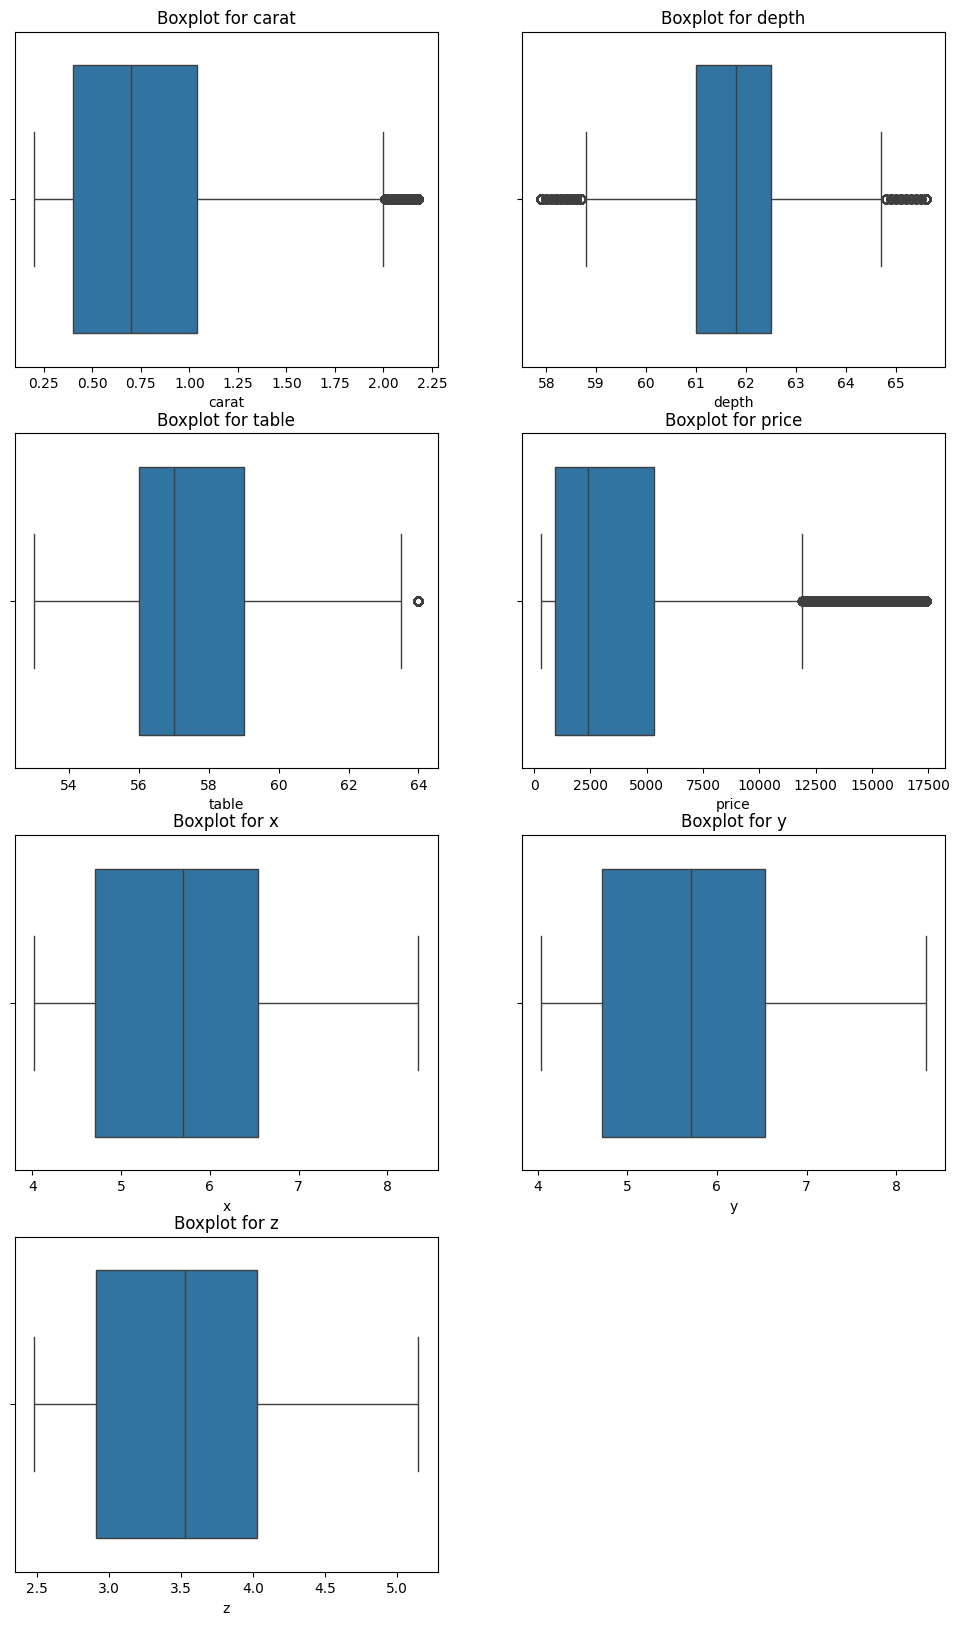

In [194]:
plt.figure(figsize=(12, 20))
for i in range(len(num_cols)):
    plt.subplot(4, 2, i + 1)
    ax = sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

* We can Clearly See that Completely Outliers are removed from column x,y,z and extreme Outliers are removed from column carat, depth and price.

## **Select x and y**

In [195]:
x = df.drop(['price'], axis=1)
y = df['price']
print(x.shape)
print(y.shape)

(53794, 9)
(53794,)


## **Split data into train and test**

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,
                                                 random_state=42) 

In [197]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)  

(53764, 9)
(30, 9)
(53764,)
(30,)


In [198]:
print(num_cols)
num_cols1 = ['carat', 'depth', 'table', 'x', 'y', 'z'] 
print(num_cols1) 
print(cat_cols)  

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
['carat', 'depth', 'table', 'x', 'y', 'z']
Index(['cut', 'color', 'clarity'], dtype='object')


## **Creating a Data Preprocessing Pipeline with Numerical Scaling and Categorical Encoding**

In [199]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  

categorical_transfomer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  

In [200]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols1),
        ('cat', categorical_transfomer,cat_cols)
    ]) 

## **Model Building** 

In [201]:
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100,
                                        random_state=42))
]) 

In [202]:
model1.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [203]:
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
]) 

In [204]:
model2.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [205]:
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
]) 

In [206]:
model3.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [207]:
model4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge()) 
]) 

In [208]:
model4.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', Ridge())])

In [209]:
model5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso()) 
]) 

In [210]:
model5.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', Lasso())])

## **Generating Predictions for All Models**

In [211]:
ypred1 = model1.predict(x_test)
ypred2 = model2.predict(x_test)
ypred3 = model3.predict(x_test)
ypred4 = model4.predict(x_test)
ypred5 = model5.predict(x_test)

## **Evaluation Metrics for Multiple Regression Models**

In [212]:
train_scores = [
    model1.score(x_train, y_train),
    model2.score(x_train, y_train),
    model3.score(x_train, y_train),
    model4.score(x_train, y_train),
    model5.score(x_train, y_train)
]

test_scores = [
    model1.score(x_test, y_test),
    model2.score(x_test, y_test),
    model3.score(x_test, y_test),
    model4.score(x_test, y_test),
    model5.score(x_test, y_test)
]

mse_values = [
    mean_squared_error(y_test, ypred1),
    mean_squared_error(y_test, ypred2),
    mean_squared_error(y_test, ypred3),
    mean_squared_error(y_test, ypred4),
    mean_squared_error(y_test, ypred5)
]

r2_values = [
    r2_score(y_test, ypred1),
    r2_score(y_test, ypred2),
    r2_score(y_test, ypred3),
    r2_score(y_test, ypred4),
    r2_score(y_test, ypred5)
]

rmse_values = [
    np.sqrt(mean_squared_error(y_test, ypred1)),
    np.sqrt(mean_squared_error(y_test, ypred2)),
    np.sqrt(mean_squared_error(y_test, ypred3)),
    np.sqrt(mean_squared_error(y_test, ypred4)),
    np.sqrt(mean_squared_error(y_test, ypred5))
]

mae_values = [
    mean_absolute_error(y_test, ypred1),
    mean_absolute_error(y_test, ypred2),
    mean_absolute_error(y_test, ypred3),
    mean_absolute_error(y_test, ypred4),
    mean_absolute_error(y_test, ypred5)
]

model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

results = {
    'Model': model_names,
    'MSE': mse_values,
    'R2 Score': r2_values,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'Train Score': train_scores,
    'Test Score': test_scores
}

results_df = pd.DataFrame(results)

results_df


,Model,MSE,R2 Score,RMSE,MAE,Train Score,Test Score
0,Model 1,1.839711e+05,0.984466,428.918525,253.746167,0.997421,0.984466
1,Model 2,3.879981e+05,0.967238,622.894908,366.200000,0.999963,0.967238
2,Model 3,1.286356e+06,0.891382,1134.176352,768.753401,0.930144,0.891382
3,Model 4,1.285609e+06,0.891445,1133.846939,768.564353,0.930144,0.891445
4,Model 5,1.274342e+06,0.892397,1128.867648,759.807603,0.930038,0.892397


#### **Conclusion: -**

* Model 1 is performing the best overall based on MSE, RMSE, R2 Score and Test Score.

## **Saving the best Model (Using pickle Library)**

In [215]:
pickle.dump(model1, open('Random_Forest_Regressor.pkl','wb'))

## **Loading the Model**

In [216]:
Loaded_model = pickle.load(open('Random_Forest_Regressor.pkl','rb'))

## **Creating the Sample Dataset of the Original Data**

In [217]:
sample_dataset = df.sample(n=20, replace=False)

## **Saving the Sample Data** 

In [218]:
sample_dataset.to_csv('Sample_Data.csv', index=False)

## **Sample Dataset** 

In [222]:
print(sample_dataset.shape)
sample_dataset.head(10) 

(20, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
35756,0.33,Very Good,F,VVS1,62.0,56.0,912.0,4.43,4.46,2.75
17855,1.16,Premium,G,VS2,59.9,60.0,7203.0,6.88,6.85,4.11
23728,0.33,Ideal,H,VVS2,61.6,55.0,633.0,4.48,4.51,2.77
49231,0.54,Ideal,F,VS1,61.1,55.0,2083.0,5.26,5.32,3.23
45951,0.56,Premium,D,SI1,60.6,59.0,1723.0,5.34,5.36,3.24
16293,1.00,Very Good,E,VS2,62.6,60.0,6518.0,6.35,6.40,3.99
45266,0.54,Very Good,D,SI1,62.9,57.0,1662.0,5.17,5.22,3.27
672,0.72,Ideal,E,SI1,60.3,57.0,2847.0,5.83,5.85,3.52
46298,0.30,Very Good,E,SI1,62.9,57.0,526.0,4.27,4.32,2.70
12122,0.91,Premium,E,VS1,61.9,59.0,5167.0,6.23,6.17,3.84


## **Checking How the model is Performing on Sample dataset**

In [246]:
predictions = Loaded_model.predict(sample_dataset.drop(columns=['price']))
predictions[:10]

array([ 904.26, 7256.32,  654.02, 2014.1 , 1743.9 , 6567.06, 1638.25,
       2851.34,  530.22, 5179.04])